# Multiple Subplots

Subplots: groups of smaller axes that can exist together within a single figure. Might be insets, grids of plots, or other complicated layouts.

__Import libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

---

## plt.axes: Subplots by Hand

plt.axes create a standard axes object that fils the entire figure. Optional argument is a list of figure coordinate system [bottom, left, width,
height].

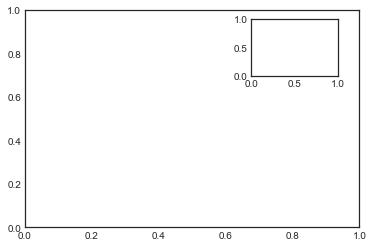

In [2]:
ax1 = plt.axes() # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

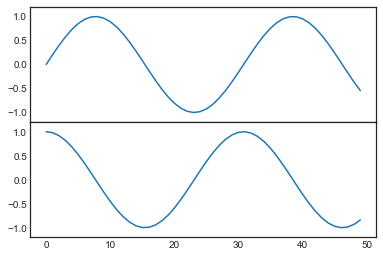

In [3]:
# object-oriented interface
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                  xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

---

## plt.subplot: Simple Grids of Subplots

plt.subplot creates a single subplot within a grid

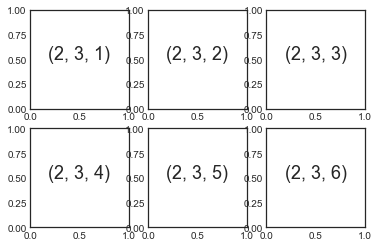

In [4]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
            fontsize=18, ha='center')

The command plt.subplots_adjust can be used to adjust the spacing between
these plots.

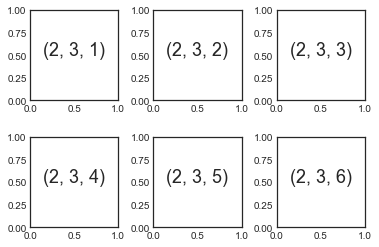

In [5]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

---

## plt.subplots: The Whole Grid in One Go

plt.subplots is creating a full grid of subplots in a single line, returning then in a numpy array.

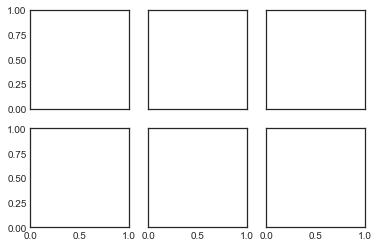

In [6]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row' )

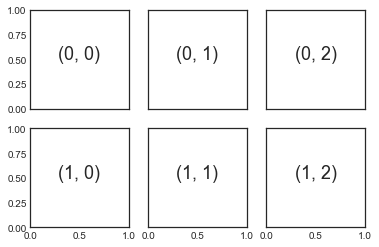

In [7]:
# axes are in a two dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                     fontsize=18, ha='center')
fig

---

## plt.GridSpec: More Complicated Arrangements

The plt.GridSpec() object does not create a plot by itself; it is simply a convenient interface that is recognized by the plt.subplot() command.

In [8]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

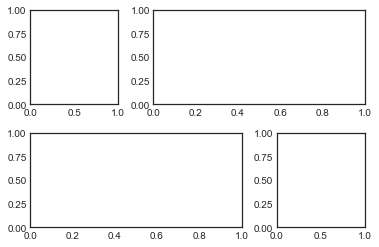

In [9]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

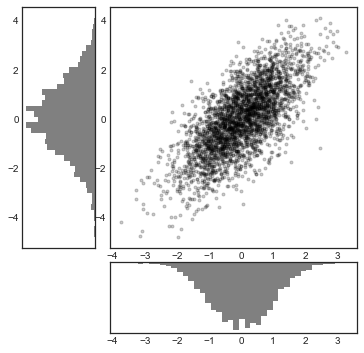

In [10]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

---

## Experimentation

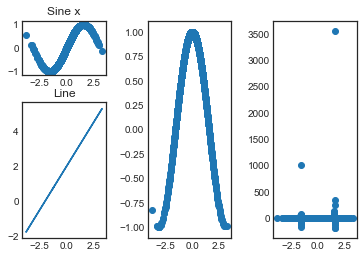

In [24]:
fig = plt.figure()
grid = fig.add_gridspec(3, 3, hspace=0.5, wspace=0.5)
plot1 = plt.subplot(grid[0, 0])
plot1.scatter(x, np.sin(x))
plot1.set_title('Sine x')
plot2 = plt.subplot(grid[1:, 0])
plot2.plot(x, x+2)
plot2.set_title('Line')
plot3 = plt.subplot(grid[:, 1])
plot3.scatter(x, np.cos(x))
plot4 = plt.subplot(grid[:, 2])
plot4.scatter(x, np.tan(x));